## The most demanded job skills for different data jobs in EU? What are they?

##### Methodology
##### 1. Cleaning up skills column by exploding it
##### 2. Calculating skill counts by the column of the job titles
##### 3. Calculate the likelihood of the given skill appearing in the job posting per job title
##### 4. Plot final finding using horizontal bar charts

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
list_countries = [
    "Austria",
    "Belgium",
    "Bulgaria",
    "Croatia",
    "Cyprus",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Ireland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Malta",
    "Netherlands",
    "Poland",
    "Portugal",
    "Romania",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden"
]

df_EU = df[df['job_country'].isin(list_countries)].copy()

In [8]:
df_exploded = df_EU.explode('job_skills') #step 1
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size() #step 2
df_skills_count = skills_count.reset_index(name= 'skills_count')
df_skills_count = df_skills_count.sort_values(by= 'skills_count', ascending=False)
df_skills_count

,job_title_short,job_skills,skills_count
758,Data Engineer,python,31556
792,Data Engineer,sql,30687
980,Data Scientist,python,28391
569,Data Analyst,sql,25529
624,Data Engineer,azure,19633
...,...,...,...
1074,Machine Learning Engineer,blazor,1
1707,Senior Data Scientist,microsoft teams,1
1643,Senior Data Scientist,centos,1
293,Cloud Engineer,mlr,1


In [10]:
job_titles = df_exploded['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:4])
job_titles

['Business Analyst', 'Data Analyst', 'Data Engineer', 'Data Scientist']

In [28]:
df_job_title_count_eu = df_EU['job_title_short'].value_counts().reset_index(name='jobs_total')

In [32]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count_eu, how='left', on='job_title_short')
df_skills_perc['percentage'] = df_skills_perc['skills_count'] / df_skills_perc['jobs_total'] * 100
df_skills_perc

,job_title_short,job_skills,skills_count,jobs_total,percentage
0,Data Engineer,python,31556,56416,55.934487
1,Data Engineer,sql,30687,56416,54.394144
2,Data Scientist,python,28391,45074,62.987532
3,Data Analyst,sql,25529,57213,44.620978
4,Data Engineer,azure,19633,56416,34.800411
...,...,...,...,...,...
2030,Machine Learning Engineer,blazor,1,5048,0.019810
2031,Senior Data Scientist,microsoft teams,1,8994,0.011119
2032,Senior Data Scientist,centos,1,8994,0.011119
2033,Cloud Engineer,mlr,1,4683,0.021354


In [37]:
import seaborn as sns

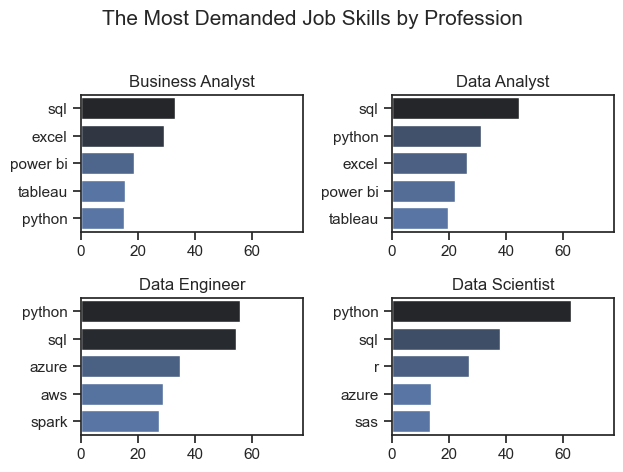

In [50]:
fig, ax = plt.subplots(2, 2)

ax = ax.flatten()

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    if i < 4: 
        df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)

        sns.barplot(data=df_plot, x='percentage', y='job_skills', ax=ax[i], hue='skills_count', palette='dark:b_r')

        ax[i].set_ylabel('')
        ax[i].set_xlabel('')
        ax[i].set_xlim(0, 78)
        ax[i].legend().set_visible(False)

        ax[i].set_title(job_title)

fig.suptitle('The Most Demanded Job Skills by Profession', fontsize=15)

fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()